In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
covid_data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [5]:
covid_data['date']=pd.to_datetime(covid_data['date']).dt.date

In [7]:
covid_data.to_csv('covid_data.csv',index=False)

In [29]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [30]:
covid_data.shape

(221911, 67)

I chose barplot to illustrate human development index because it allows to have a clear vision of rich countries

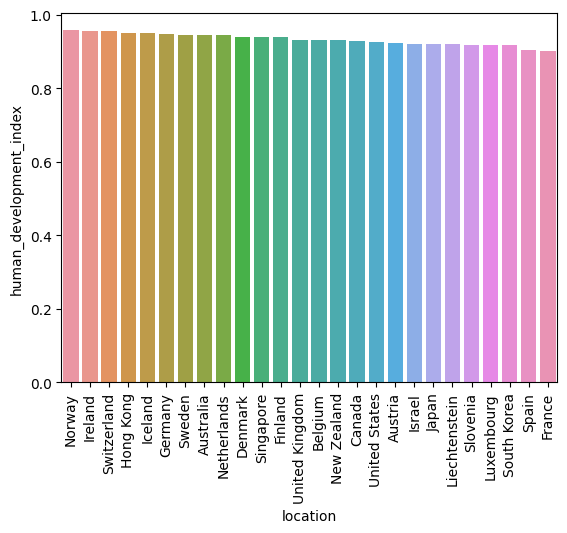

In [35]:
sns.barplot(data=covid_data[covid_data["human_development_index"]>0.9].sort_values(by="human_development_index",ascending=False),\
            x='location',y="human_development_index")

plt.xticks(rotation=90)
plt.show()

Sorting countries by `human_development_index` after sorting barplot display well the difference between countries in this comparaison

In [36]:
covid_data_france=covid_data[covid_data['location']=='France']
covid_data.shape

(221911, 67)

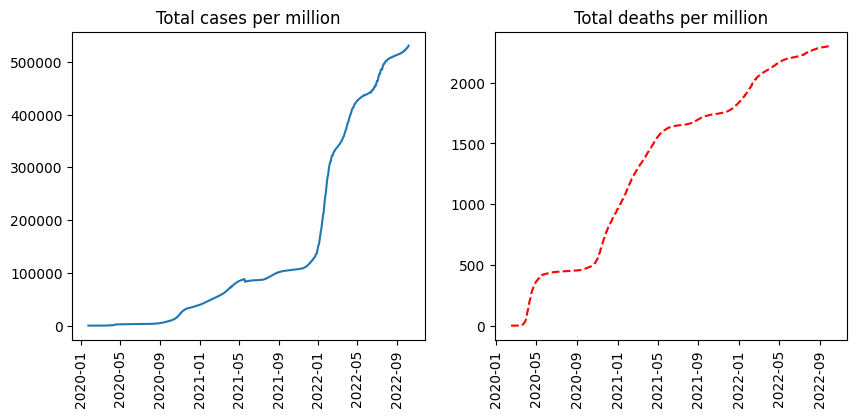

In [37]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,4))


axs[0].plot(covid_data_france.date,covid_data_france.total_cases_per_million)

axs[0].tick_params(axis='x', rotation=90)

axs[0].set_title('Total cases per million')

axs[1].plot(covid_data_france.date,covid_data_france.total_deaths_per_million,'r--')

axs[1].tick_params(axis='x', rotation=90)

axs[1].set_title('Total deaths per million')

plt.show()

We have a time series then the quite good graphics is lineplot or areaplot to catch up the evolution of cases of covid

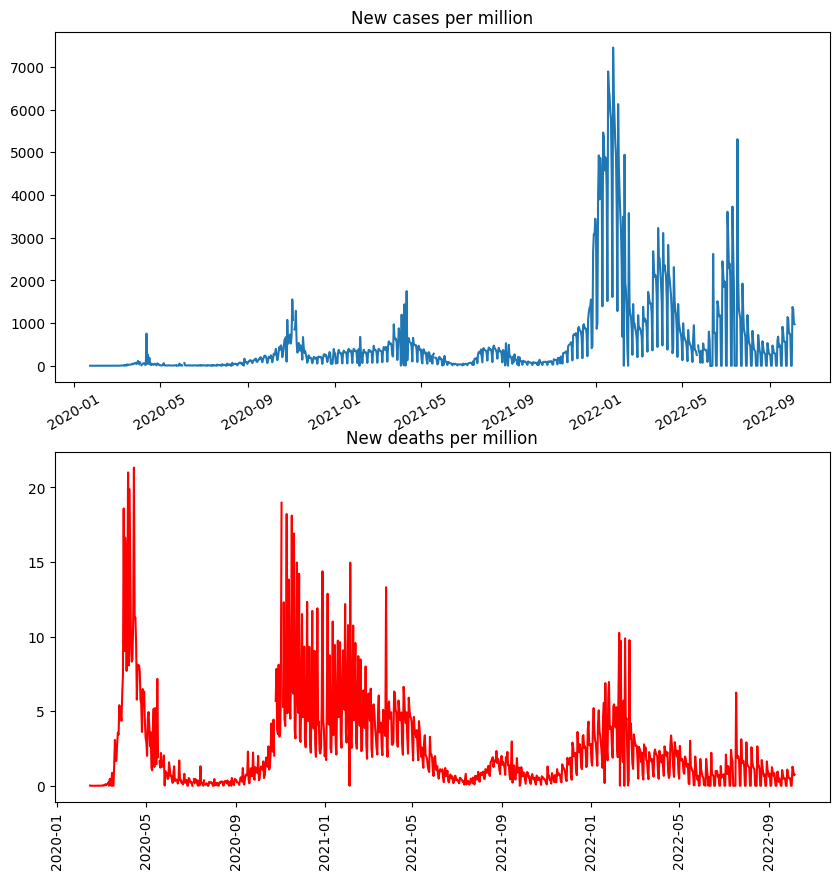

In [38]:
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(10,10))



axs[0].plot(covid_data_france.date,covid_data_france.new_cases_per_million)

axs[0].tick_params(axis='x', rotation=30)

axs[0].set_title('New cases per million')

axs[1].plot(covid_data_france.date,covid_data_france.new_deaths_per_million,'r-')

axs[1].tick_params(axis='x', rotation=90)

axs[1].set_title('New deaths per million')

plt.show()

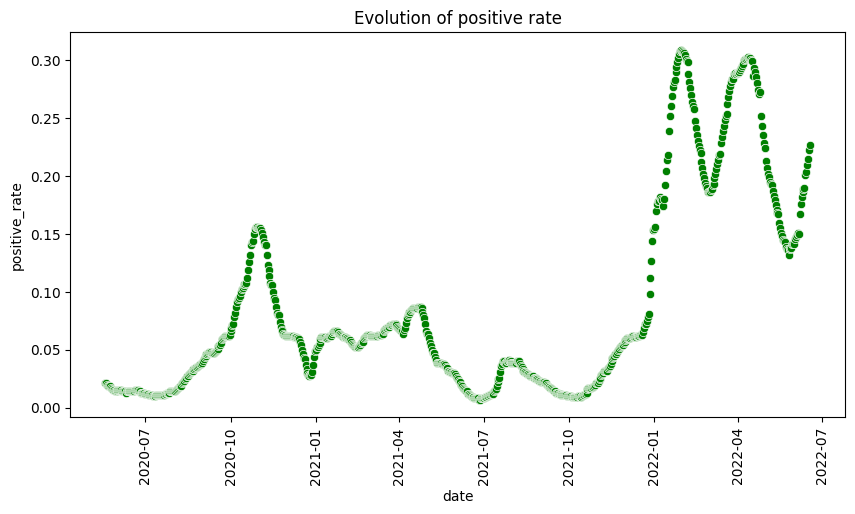

In [39]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=covid_data_france,x='date',y='positive_rate',color='green')

plt.xticks(rotation=90)

plt.title("Evolution of positive rate")

plt.show()

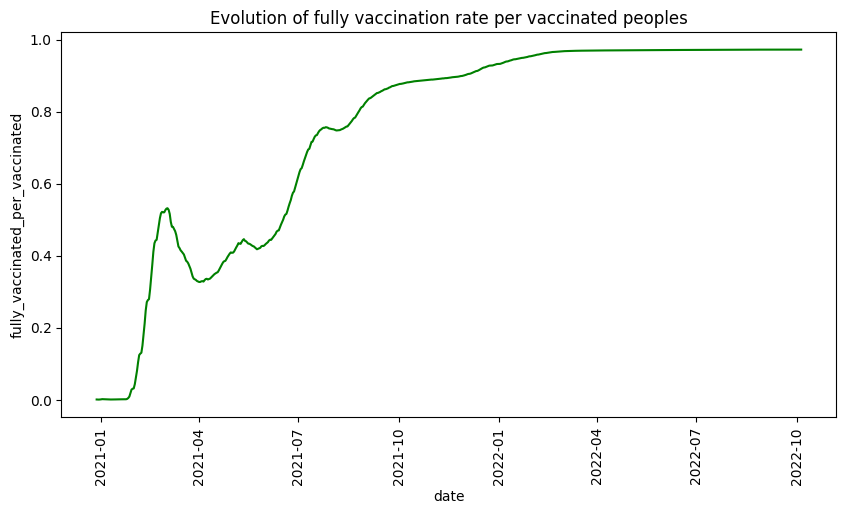

In [42]:
covid_data_france['fully_vaccinated_per_vaccinated']=covid_data_france['people_fully_vaccinated']/covid_data_france['people_vaccinated']

plt.figure(figsize=(10,5))

sns.lineplot(data=covid_data_france,x='date',y='fully_vaccinated_per_vaccinated',color='green')

plt.xticks(rotation=90)

plt.title("Evolution of fully vaccination rate per vaccinated peoples")

plt.show()

In [43]:
corr_cols=["excess_mortality","extreme_poverty","positive_rate",'new_tests','new_cases','new_deaths',\
           'reproduction_rate','hosp_patients','people_fully_vaccinated_per_hundred','stringency_index',\
           'handwashing_facilities','icu_patients']
corr=covid_data[corr_cols].corr()

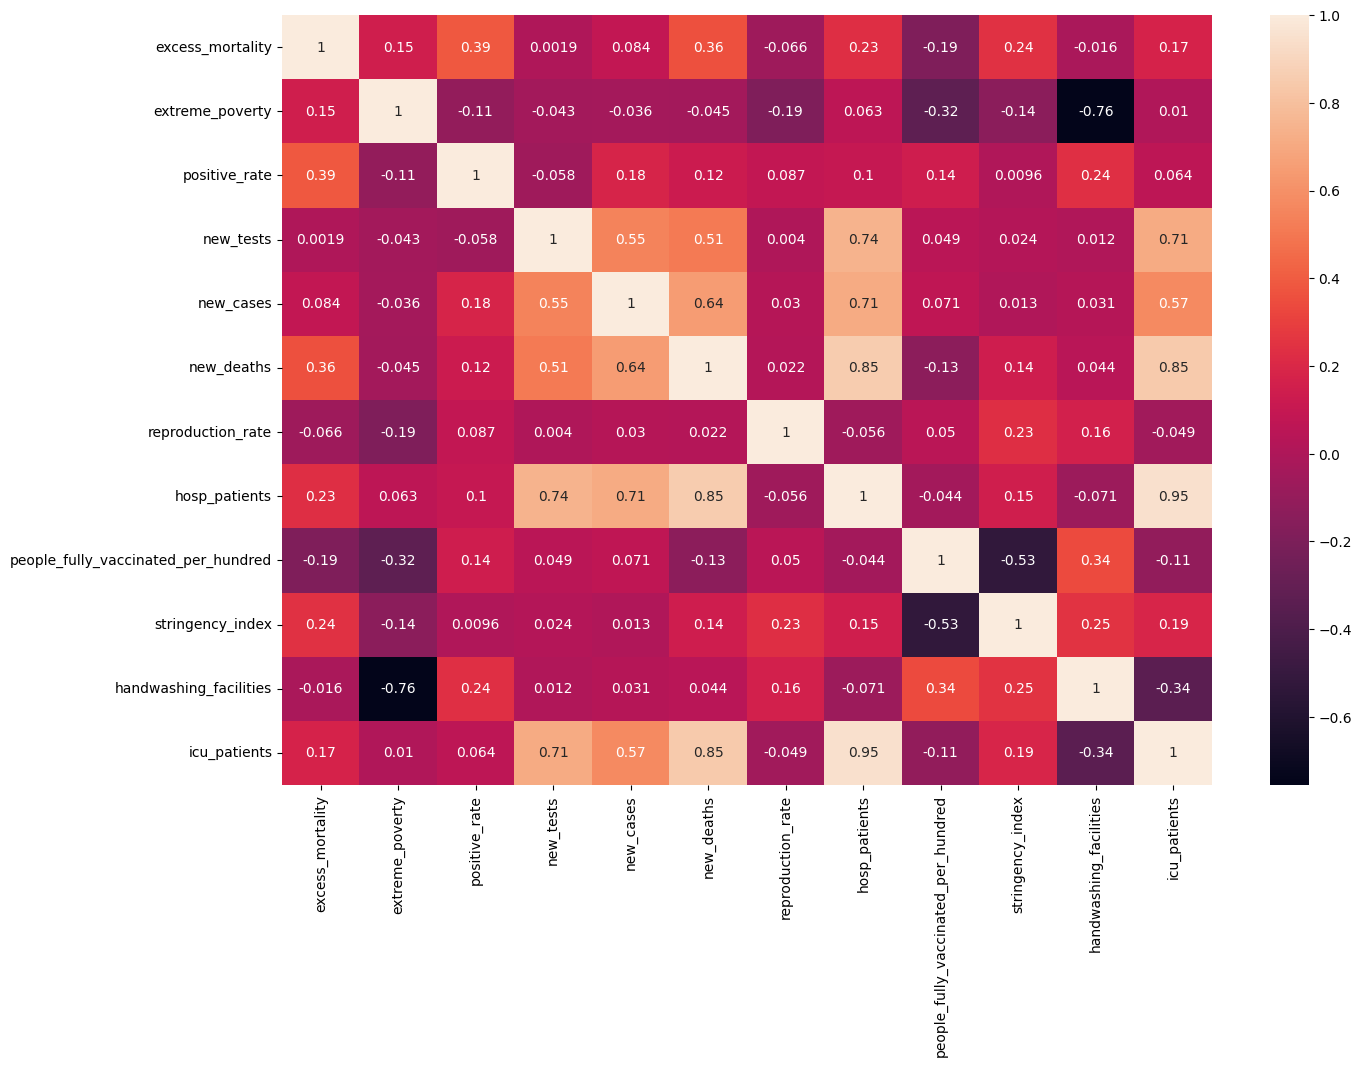

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

Heatmap allow us to have a clear interpretation of correlation just by seeing heatmap graphic with its label

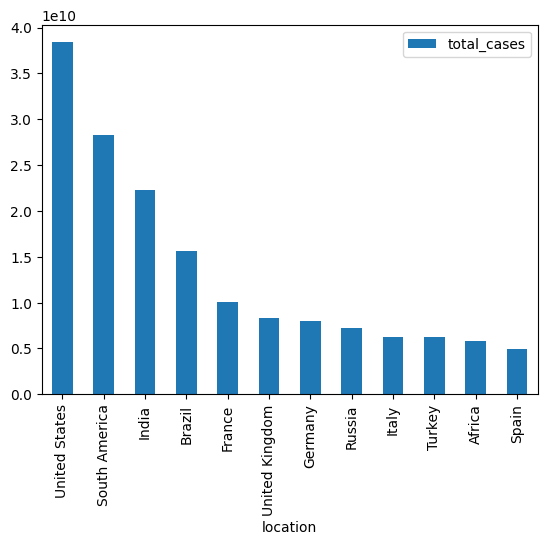

In [45]:
covid_data.groupby(['location']).sum().sort_values(by='total_cases',ascending=False)\
.iloc[8:20].plot(kind='bar',y='total_cases')
plt.show()

Barplot is the adapted graphic for the distribution total cases of covid-19 per country

<Figure size 1000x500 with 0 Axes>

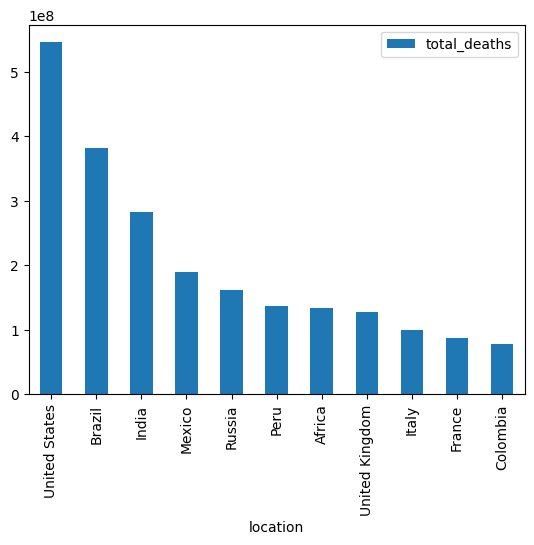

In [46]:
plt.figure(figsize=(10,5))
covid_data.groupby(['location']).sum().sort_values(by='total_deaths',ascending=False)\
.iloc[9:20].plot(kind='bar',y='total_deaths')
plt.show()

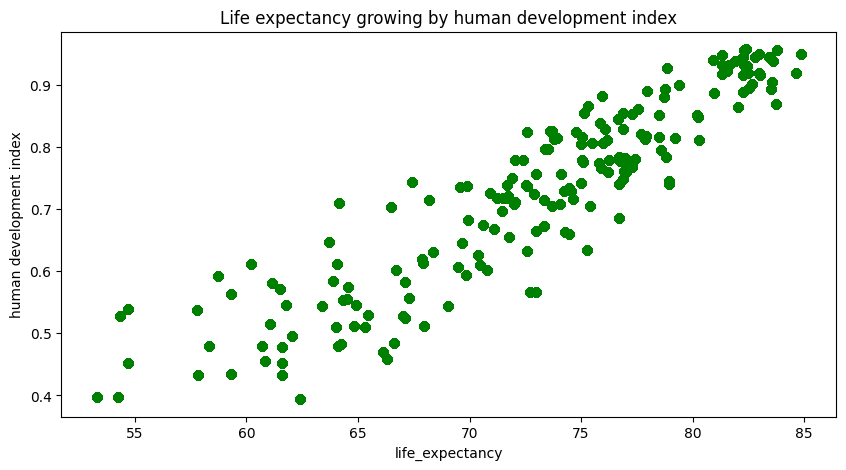

In [47]:
plt.figure(figsize=(10,5))
plt.plot(covid_data.life_expectancy,covid_data.human_development_index,'go')
plt.title("Life expectancy growing by human development index")
plt.xlabel('life_expectancy')
plt.ylabel('human development index')
plt.show()

To catch up by visualisation the correlation between to variables by scatterplot

In [15]:
def plot_pie(df, column, title):
    labels = list(df.index)
    sizes = list(df[column])
    explode = [0 for n in range(10)]
    
    with plt.style.context(
        { "axes.prop_cycle" : plt.cycler("color", 
        plt.cm.tab20c.colors)}):
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, 
                explode=explode, 
                labels=labels, 
                autopct='%1.2f%%', 
                shadow=False, 
                startangle=0)
        ax1.axis('equal')  
        
        #plt.legend(loc='best')
        plt.title(title)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.show()

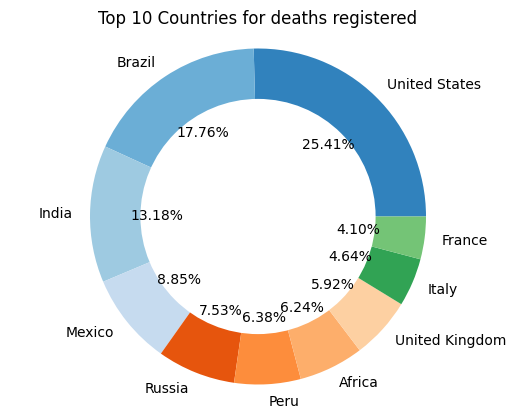

In [24]:
top10_countries_deaths = covid_data.groupby(by="location").sum().sort_values(by="total_deaths",ascending=False).iloc[9:19]

plot_pie(top10_countries_deaths, 
         "total_deaths", 
         "Top 10 Countries for deaths registered")

Distribution of number of deaths per location